In [1]:
import os
import zarr
from config import DATA_DIR, TARGET_DIR
import numpy as np

def process_experiment_runs(base_dir):
    # Dictionnaire pour stocker les résultats par TS
    data_results = {}

    # Parcourir tous les sous-dossiers dans ExperimentRuns
    for ts_folder in os.listdir(base_dir):
        ts_path = os.path.join(base_dir, ts_folder)

        # Vérifier si le dossier contient un fichier Zarr
        zarr_path = os.path.join(ts_path, "VoxelSpacing10.000/denoised.zarr")
        if os.path.exists(zarr_path):
            print(f"Traitement de {ts_folder}...")

            # Charger le groupe Zarr
            zgroup = zarr.open_group(zarr_path, mode='r')
            
            # Visualiser l'arborescence
            print(f"Arborescence pour {ts_folder}:")
            print(zgroup.tree())
            
            # Dictionnaire pour stocker les données de ce TS
            ts_data = {}

            # Parcourir les sous-groupes (0, 1, 2, ...)
            for subgroup_key in zgroup.keys():
                subgroup = zgroup[subgroup_key]

                # Extraire les métadonnées et les données
                ts_data[subgroup_key] = {
                    "attrs": dict(subgroup.attrs),  # Convertir les métadonnées en dictionnaire
                    "info": subgroup.info,
                    "data": subgroup[:],  # Charger les données complètes
                }

            # Ajouter les données au dictionnaire global
            data_results[ts_folder] = ts_data

    return data_results




# Traiter les tomogrammes
all_data = process_experiment_runs(DATA_DIR)

# Sauvegarder les résultats ou continuer l'analyse
print("Traitement terminé. Résumé des données extraites :")
for ts_name, ts_content in all_data.items():
    print(f"- {ts_name}: {len(ts_content)} sous-groupes traités.")


Traitement de TS_5_4...
Arborescence pour TS_5_4:


/
├── 0 (184, 630, 630) float32
├── 1 (92, 315, 315) float32
└── 2 (46, 158, 158) float32


Traitement de TS_69_2...
Arborescence pour TS_69_2:


/
├── 0 (184, 630, 630) float32
├── 1 (92, 315, 315) float32
└── 2 (46, 158, 158) float32


Traitement de TS_6_4...
Arborescence pour TS_6_4:


/
├── 0 (184, 630, 630) float32
├── 1 (92, 315, 315) float32
└── 2 (46, 158, 158) float32


Traitement de TS_6_6...
Arborescence pour TS_6_6:


/
├── 0 (184, 630, 630) float32
├── 1 (92, 315, 315) float32
└── 2 (46, 158, 158) float32


Traitement de TS_73_6...
Arborescence pour TS_73_6:


/
├── 0 (184, 630, 630) float32
├── 1 (92, 315, 315) float32
└── 2 (46, 158, 158) float32


Traitement de TS_86_3...
Arborescence pour TS_86_3:


/
├── 0 (184, 630, 630) float32
├── 1 (92, 315, 315) float32
└── 2 (46, 158, 158) float32


Traitement de TS_99_9...
Arborescence pour TS_99_9:


/
├── 0 (184, 630, 630) float32
├── 1 (92, 315, 315) float32
└── 2 (46, 158, 158) float32


Traitement terminé. Résumé des données extraites :
- TS_5_4: 3 sous-groupes traités.
- TS_69_2: 3 sous-groupes traités.
- TS_6_4: 3 sous-groupes traités.
- TS_6_6: 3 sous-groupes traités.
- TS_73_6: 3 sous-groupes traités.
- TS_86_3: 3 sous-groupes traités.
- TS_99_9: 3 sous-groupes traités.


In [2]:
all_data.keys()

dict_keys(['TS_5_4', 'TS_69_2', 'TS_6_4', 'TS_6_6', 'TS_73_6', 'TS_86_3', 'TS_99_9'])

In [3]:
all_data['TS_5_4'].keys()

dict_keys(['0', '1', '2'])

In [4]:
all_data['TS_5_4']['0']['data']

array([[[-1.0589503e-08,  1.5891337e-06,  8.6985551e-07, ...,
          1.2546960e-06,  2.7620436e-07, -9.6554413e-07],
        [-4.9929668e-07,  2.7837150e-06,  3.0947467e-06, ...,
          2.8480628e-07, -8.9094044e-08, -1.4401762e-06],
        [-1.0891541e-06,  1.5427659e-06,  1.4145429e-06, ...,
          1.8715558e-07, -5.1522932e-07, -1.3863324e-06],
        ...,
        [-6.9335545e-07,  3.5703101e-07,  8.0947825e-07, ...,
         -1.4218481e-06, -9.1161525e-08, -1.2515941e-06],
        [-4.2106151e-07,  2.2317974e-07,  8.7088415e-07, ...,
         -2.5142091e-07,  4.4749459e-07,  3.5609071e-07],
        [-2.6293966e-07, -2.7313038e-07, -5.7560578e-07, ...,
          7.9891106e-07,  4.1823807e-07,  1.9056137e-07]],

       [[-8.9148364e-07,  1.9433514e-06,  4.5870165e-06, ...,
          2.9067949e-06,  8.9173477e-07, -1.3247987e-06],
        [-1.5419438e-06,  3.6550177e-06,  8.8251591e-06, ...,
         -5.1537575e-07, -6.8805934e-07, -1.8712533e-06],
        [-2.2441336e-06, 

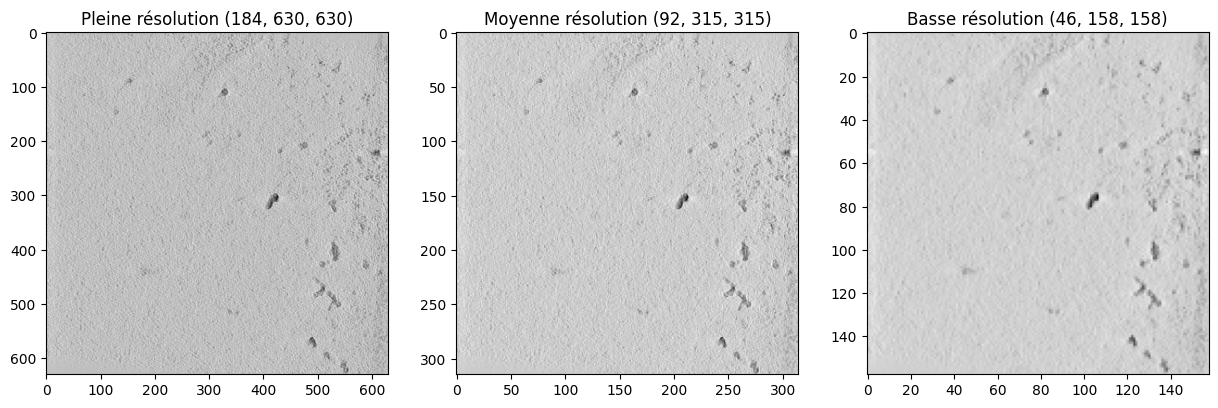

In [5]:
import matplotlib.pyplot as plt

# Afficher une coupe z=0 pour chaque résolution
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(all_data['TS_5_4']['0']['data'][0,:,:], cmap='gray')
axs[0].set_title("Pleine résolution (184, 630, 630)")
axs[1].imshow(all_data['TS_5_4']['1']['data'][0,:,:], cmap='gray')
axs[1].set_title("Moyenne résolution (92, 315, 315)")
axs[2].imshow(all_data['TS_5_4']['2']['data'][0,:,:], cmap='gray')
axs[2].set_title("Basse résolution (46, 158, 158)")
plt.show()

In [6]:
import json

def load_targets(base_path):
    # Dictionnaire pour stocker les informations de chaque tomogramme
    target_data = {}

    # Parcourir tous les dossiers dans le chemin de base (numéros de tomogrammes)
    for tomogram_folder in os.listdir(base_path):
        tomogram_path = os.path.join(base_path, tomogram_folder)

        # Vérifier si un dossier "Picks" existe dans le tomogramme
        picks_path = os.path.join(tomogram_path, "Picks")
        if not os.path.exists(picks_path):
            print(f"Pas de dossier 'Picks' dans {tomogram_folder}")
            continue

        # Parcourir tous les fichiers JSON dans le dossier "Picks"
        for json_file in os.listdir(picks_path):
            if json_file.endswith(".json"):
                json_path = os.path.join(picks_path, json_file)

                # Charger le fichier JSON
                with open(json_path, 'r') as f:
                    data = json.load(f)

                # Extraire le nom de la molécule et la localisation des points
                molecule_name = data.get("pickable_object_name", "inconnu")
                points = data.get("points", [])

                # Ajouter les informations au dictionnaire
                if tomogram_folder not in target_data:
                    target_data[tomogram_folder] = {}

                # Sauvegarder les données pour chaque molécule dans le tomogramme
                target_data[tomogram_folder][molecule_name] = points

    return target_data

# Charger les targets
all_targets = load_targets(TARGET_DIR)

# Affichage des données chargées
print("Résumé des données de targets :")
for tomogram, molecules in all_targets.items():
    print(f"- {tomogram}: {len(molecules)} molécules trouvées")
    for molecule, points in molecules.items():
        print(f"  * {molecule}: {len(points)} points")


Résumé des données de targets :
- TS_5_4: 6 molécules trouvées
  * apo-ferritin: 46 points
  * beta-amylase: 10 points
  * beta-galactosidase: 12 points
  * ribosome: 31 points
  * thyroglobulin: 30 points
  * virus-like-particle: 11 points
- TS_69_2: 6 molécules trouvées
  * apo-ferritin: 35 points
  * beta-amylase: 12 points
  * beta-galactosidase: 16 points
  * ribosome: 37 points
  * thyroglobulin: 34 points
  * virus-like-particle: 9 points
- TS_6_4: 6 molécules trouvées
  * apo-ferritin: 58 points
  * beta-amylase: 9 points
  * beta-galactosidase: 12 points
  * ribosome: 74 points
  * thyroglobulin: 30 points
  * virus-like-particle: 10 points
- TS_6_6: 6 molécules trouvées
  * apo-ferritin: 41 points
  * beta-amylase: 14 points
  * beta-galactosidase: 11 points
  * ribosome: 23 points
  * thyroglobulin: 35 points
  * virus-like-particle: 19 points
- TS_73_6: 6 molécules trouvées
  * apo-ferritin: 95 points
  * beta-amylase: 12 points
  * beta-galactosidase: 14 points
  * ribosom

In [7]:
import os
import zarr
import json

def prepare_dataset(image_path, target_path):
    """
    Prépare un dataset associant les données d'images aux targets (protéines et positions).
    
    Args:
        image_path (str): Chemin vers le dossier contenant les images Zarr.
        target_path (str): Chemin vers le dossier contenant les targets (fichiers JSON).

    Returns:
        list: Liste de dictionnaires, où chaque élément contient les données d'un tomogramme :
            - "name": Nom du tomogramme.
            - "images": Liste des résolutions (volumes 3D).
            - "targets": Dictionnaire {type_molécule: [positions (x, y, z)]}.
    """
    dataset = []

    # Parcourir les tomogrammes dans le dossier des images
    for tomogram_name in os.listdir(image_path):
        tomogram_image_path = os.path.join(image_path, tomogram_name, "VoxelSpacing10.000/denoised.zarr")
        tomogram_target_path = os.path.join(target_path, tomogram_name, "Picks")

        # Vérifier que les données Zarr et les targets existent
        if not os.path.exists(tomogram_image_path):
            print(f"Images non trouvées pour {tomogram_name}, ignoré.")
            continue

        if not os.path.exists(tomogram_target_path):
            print(f"Targets non trouvés pour {tomogram_name}, ignoré.")
            continue

        # Charger les images (volumes 3D à plusieurs résolutions)
        zgroup = zarr.open_group(tomogram_image_path, mode='r')
        sorted_keys = sorted(zgroup.keys(), key=lambda k: np.prod(zgroup[k].shape), reverse=True)
        images = [zgroup[key][:] for key in sorted_keys]

        # Charger les targets (localisations des particules)
        targets = {}
        for json_file in os.listdir(tomogram_target_path):
            if json_file.endswith(".json"):
                json_path = os.path.join(tomogram_target_path, json_file)
                with open(json_path, 'r') as f:
                    data = json.load(f)
                    molecule_name = data.get("pickable_object_name", "unknown")
                    points = [
                        [point["location"]["x"], point["location"]["y"], point["location"]["z"]]
                        for point in data["points"]
                    ]
                    if molecule_name not in targets:
                        targets[molecule_name] = []
                    targets[molecule_name].extend(points)

        # Ajouter les données du tomogramme au dataset
        dataset.append({
            "name": tomogram_name,
            "images": images,  # Liste des résolutions
            "targets": targets  # Localisations des particules par type
        })

    return dataset

# print tomogram shapes for each resolution in the order of the dataset
def print_shapes(dataset):
    for tomogram in dataset:
        print(f"Tomogramme {tomogram['name']}:")
        for i, image in enumerate(tomogram['images']):
            print(f"  - Résolution {i}: {image.shape}")




In [8]:
# Chemins des données

# Préparer le dataset
dataset = prepare_dataset(DATA_DIR, TARGET_DIR)

print_shapes(dataset)

# Exemple : Afficher les données du premier tomogramme
print(f"Nom du tomogramme : {dataset[0]['name']}")
print(f"Forme de l'image (résolution 1) : {dataset[0]['images'][0].shape}")
print(f"Targets : {dataset[0]['targets']}")

Tomogramme TS_5_4:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Tomogramme TS_69_2:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Tomogramme TS_6_4:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Tomogramme TS_6_6:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Tomogramme TS_73_6:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Tomogramme TS_86_3:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Tomogramme TS_99_9:
  - Résolution 0: (184, 630, 630)
  - Résolution 1: (92, 315, 315)
  - Résolution 2: (46, 158, 158)
Nom du tomogramme : TS_5_4
Forme de l'image (résolution 1) : (184, 630, 630)
Targets : {'apo-ferritin': [[468.514, 5915.906, 604.167], [5674.694, 1114.354, 565.068

In [9]:
import cv2
import numpy as np

def gaussian_filter_3d(volume, sigma):
    """
    Applique un flou gaussien à un volume 3D en traitant chaque slice 2D individuellement.
    
    Args:
        volume (np.array): Volume 3D (z, y, x).
        sigma (float): Écart-type pour le noyau gaussien.

    Returns:
        np.array: Volume 3D flouté.
    """
    blurred_volume = np.zeros_like(volume, dtype=np.float32)
    for z in range(volume.shape[0]):  # Itérer sur les slices 2D
        blurred_volume[z] = cv2.GaussianBlur(volume[z], (0, 0), sigma)
    return blurred_volume


In [10]:
def create_heatmaps(volume_shape, targets, sigma=3, method="opencv"):
    """
    Crée des heatmaps multi-canaux pour les targets avec un flou gaussien.
    
    Args:
        volume_shape (tuple): Dimensions du volume 3D.
        targets (dict): Targets {type_molecule: [positions (x, y, z)]}.
        sigma (float): Écart-type pour le flou gaussien.
        method (str): Méthode pour appliquer le flou ("opencv" ou "numpy").

    Returns:
        np.array: Heatmaps multi-canaux de dimensions (num_molecules, *volume_shape).
    """
    molecule_names = list(targets.keys())
    heatmaps = np.zeros((len(molecule_names), *volume_shape), dtype=np.float32)

    for i, molecule_name in enumerate(molecule_names):
        for x, y, z in targets[molecule_name]:
            if 0 <= x < volume_shape[2] and 0 <= y < volume_shape[1] and 0 <= z < volume_shape[0]:
                heatmaps[i, int(z), int(y), int(x)] += 1

        # Appliquer le flou gaussien
        if method == "opencv":
            heatmaps[i] = gaussian_filter_3d(heatmaps[i], sigma=sigma)

        else:
            raise ValueError("Méthode de flou inconnue : choisissez 'opencv' ou 'numpy'.")

    return heatmaps, molecule_names


In [11]:
# import tensorflow as tf
# from tensorflow.keras import layers, Model

# def unet_3d(input_shape, num_classes):
#     """
#     Implémentation d'un U-Net 3D en TensorFlow/Keras.

#     Args:
#         input_shape (tuple): Dimensions de l'entrée (z, y, x, c).
#         num_classes (int): Nombre de canaux de sortie (types de particules).

#     Returns:
#         tf.keras.Model: Modèle U-Net 3D.
#     """
#     inputs = layers.Input(shape=input_shape)

#     # Encodeur
#     x1 = layers.Conv3D(32, kernel_size=3, activation='relu', padding='same')(inputs)
#     x1 = layers.Conv3D(32, kernel_size=3, activation='relu', padding='same')(x1)
#     p1 = layers.MaxPooling3D(pool_size=2)(x1)

#     x2 = layers.Conv3D(64, kernel_size=3, activation='relu', padding='same')(p1)
#     x2 = layers.Conv3D(64, kernel_size=3, activation='relu', padding='same')(x2)
#     p2 = layers.MaxPooling3D(pool_size=2)(x2)

#     x3 = layers.Conv3D(128, kernel_size=3, activation='relu', padding='same')(p2)
#     x3 = layers.Conv3D(128, kernel_size=3, activation='relu', padding='same')(x3)
#     p3 = layers.MaxPooling3D(pool_size=2)(x3)

#     # Bottleneck
#     bn = layers.Conv3D(256, kernel_size=3, activation='relu', padding='same')(p3)
#     bn = layers.Conv3D(256, kernel_size=3, activation='relu', padding='same')(bn)

#     # Décodeur
#     u3 = layers.Conv3DTranspose(128, kernel_size=2, strides=2, padding='same')(bn)
#     u3 = layers.concatenate([u3, x3])
#     u3 = layers.Conv3D(128, kernel_size=3, activation='relu', padding='same')(u3)
#     u3 = layers.Conv3D(128, kernel_size=3, activation='relu', padding='same')(u3)

#     u2 = layers.Conv3DTranspose(64, kernel_size=2, strides=2, padding='same')(u3)
#     u2 = layers.concatenate([u2, x2])
#     u2 = layers.Conv3D(64, kernel_size=3, activation='relu', padding='same')(u2)
#     u2 = layers.Conv3D(64, kernel_size=3, activation='relu', padding='same')(u2)

#     u1 = layers.Conv3DTranspose(32, kernel_size=2, strides=2, padding='same')(u2)
#     u1 = layers.concatenate([u1, x1])
#     u1 = layers.Conv3D(32, kernel_size=3, activation='relu', padding='same')(u1)
#     u1 = layers.Conv3D(32, kernel_size=3, activation='relu', padding='same')(u1)

#     # Sortie
#     outputs = layers.Conv3D(num_classes, kernel_size=1, activation='sigmoid')(u1)

#     return Model(inputs, outputs)


In [12]:
import torch
import torch.nn as nn

class UNet3D(nn.Module):
    def __init__(self, in_channels, out_channels):
        """
        Modèle U-Net 3D pour prédire les heatmaps multi-canaux.
        
        Args:
            in_channels (int): Nombre de canaux d'entrée (1 pour volumes 3D en niveaux de gris).
            out_channels (int): Nombre de canaux de sortie (correspondant aux types de particules).
        """
        super(UNet3D, self).__init__()
        
        # Encoder (réduction de dimension)
        self.encoder = nn.Sequential(
            nn.Conv3d(in_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv3d(32, 64, kernel_size=3, padding=1),
            nn.ReLU()
        )

        # Bottleneck
        self.bottleneck = nn.Sequential(
            nn.Conv3d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv3d(128, 64, kernel_size=3, padding=1),
            nn.ReLU()
        )

        # Decoder (remonter les dimensions)
        self.decoder = nn.Sequential(
            nn.Conv3d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv3d(32, out_channels, kernel_size=1)  # Une heatmap par type de particule
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.bottleneck(x)
        x = self.decoder(x)
        return x

# model summary from torchsummary
from torchsummary import summary
model_test = UNet3D(in_channels=1, out_channels=6).to('cuda')
# input shape from the first tomogram (small resolution)
input_shape = (1, 46, 158, 158) # (channels, z, y, x)
# size of the first tomogram of the test dataset
sizeof_first_tomogram = dataset[0]['images'][2].shape
print(f"Size of the first tomogram: {sizeof_first_tomogram}")
summary(model_test, input_shape)


Size of the first tomogram: (46, 158, 158)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1     [-1, 32, 46, 158, 158]             896
              ReLU-2     [-1, 32, 46, 158, 158]               0
            Conv3d-3     [-1, 64, 46, 158, 158]          55,360
              ReLU-4     [-1, 64, 46, 158, 158]               0
            Conv3d-5    [-1, 128, 46, 158, 158]         221,312
              ReLU-6    [-1, 128, 46, 158, 158]               0
            Conv3d-7     [-1, 64, 46, 158, 158]         221,248
              ReLU-8     [-1, 64, 46, 158, 158]               0
            Conv3d-9     [-1, 32, 46, 158, 158]          55,328
             ReLU-10     [-1, 32, 46, 158, 158]               0
           Conv3d-11      [-1, 6, 46, 158, 158]             198
Total params: 554,342
Trainable params: 554,342
Non-trainable params: 0
----------------------------------------------------

In [27]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

class TomogramDataset(Dataset):
    def __init__(self, dataset, target_size=(64, 128, 128), sigma=3, res_channel=2):
        """
        Dataset PyTorch pour les tomogrammes avec heatmaps générées à partir des targets.

        Args:
            dataset (list): Liste contenant les images et targets.
            target_size (tuple): Taille cible des volumes et heatmaps (D, H, W).
            sigma (float): Écart-type pour le flou gaussien des heatmaps.
            res_channel (int): Indice de la résolution à utiliser pour les images. Exemple : 2 pour la basse résolution ()
        """
        self.data = []
        self.target_size = target_size  # Taille cible
        for tomogram in dataset:
            volume_shape = tomogram["images"][res_channel].shape
            heatmaps, _ = create_heatmaps(volume_shape, tomogram["targets"], sigma=sigma)
            self.data.append({"image": tomogram["images"][res_channel], "heatmaps": heatmaps})

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        
        # Charger et convertir en tenseurs
        image = torch.tensor(sample["image"], dtype=torch.float32).unsqueeze(0)  # Supprimer une dimension channel
        heatmaps = torch.tensor(sample["heatmaps"], dtype=torch.float32)
        
        # # Redimensionner à la taille cible
        # image = F.interpolate(image.unsqueeze(0), size=self.target_size, mode='trilinear', align_corners=False).squeeze(0)
        # heatmaps = F.interpolate(heatmaps.unsqueeze(0), size=self.target_size, mode='trilinear', align_corners=False).squeeze(0)
        
        return image, heatmaps

# Préparer le DataLoader
train_loader = DataLoader(TomogramDataset(dataset, target_size=(64, 128, 128)), batch_size=2, shuffle=True)

# taille des données du train_loader
for image, heatmaps in train_loader:
    print(f"Taille de l'image : {image.shape}")
    print(f"Taille des heatmaps : {heatmaps.shape}")
    break

Taille de l'image : torch.Size([2, 1, 46, 158, 158])
Taille des heatmaps : torch.Size([2, 6, 46, 158, 158])


In [28]:
import torch

# Vérifie si un GPU est disponible
if torch.cuda.is_available():
    print("GPU disponible :", torch.cuda.get_device_name(0))
else:
    print("GPU non disponible. Utilisation du CPU.")


GPU disponible : NVIDIA GeForce RTX 2080 SUPER


In [29]:
criterion = nn.MSELoss()
# Initialiser le modèle
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.current_device())

0


In [30]:
# setting device on GPU if available, else CPUdevice = torch.device('cuda' if torch.cuda.is_available() else 'cpu')print('Using device:', device)print()
#Additional Info when using cudaif device.type == 'cuda':
print(torch.cuda.get_device_name(0))
print('Memory Usage:')
print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

NVIDIA GeForce RTX 2080 SUPER
Memory Usage:
Allocated: 0.5 GB
Cached:    21.2 GB


In [31]:
model = UNet3D(in_channels=1, out_channels=len(dataset[0]["targets"])).to(device)
print("out_channel",len(dataset[0]["targets"]))
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Boucle d'entraînement
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for images, heatmaps in train_loader:
        images, heatmaps = images.to(device), heatmaps.to(device)

        # Réinitialiser les gradients
        optimizer.zero_grad()
        
        # Forward
        outputs = model(images)
        
        # Calcul de la perte
        loss = criterion(outputs, heatmaps)
        loss.backward()
        
        # Optimisation
        optimizer.step()
        
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.6f}")


out_channel 6
images shape torch.Size([2, 1, 46, 158, 158])
heatmaps shape torch.Size([2, 6, 46, 158, 158])
images shape torch.Size([2, 1, 46, 158, 158])
heatmaps shape torch.Size([2, 6, 46, 158, 158])
images shape torch.Size([2, 1, 46, 158, 158])
heatmaps shape torch.Size([2, 6, 46, 158, 158])
images shape torch.Size([1, 1, 46, 158, 158])
heatmaps shape torch.Size([1, 6, 46, 158, 158])
Epoch 1/10, Loss: 0.011849
images shape torch.Size([2, 1, 46, 158, 158])
heatmaps shape torch.Size([2, 6, 46, 158, 158])
images shape torch.Size([2, 1, 46, 158, 158])
heatmaps shape torch.Size([2, 6, 46, 158, 158])
images shape torch.Size([2, 1, 46, 158, 158])
heatmaps shape torch.Size([2, 6, 46, 158, 158])
images shape torch.Size([1, 1, 46, 158, 158])
heatmaps shape torch.Size([1, 6, 46, 158, 158])
Epoch 2/10, Loss: 0.009257
images shape torch.Size([2, 1, 46, 158, 158])
heatmaps shape torch.Size([2, 6, 46, 158, 158])
images shape torch.Size([2, 1, 46, 158, 158])
heatmaps shape torch.Size([2, 6, 46, 158

In [32]:
# Sauvegarder les poids du modèle
model_save_path = "unet3d_weights.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Modèle sauvegardé dans {model_save_path}")


Modèle sauvegardé dans unet3d_weights.pth


In [33]:
# Liste des tomogrammes d'intérêt
selected_tomograms = ["TS_5_4", "TS_6_4", "TS_69_2"]

# Filtrer le dataset
test_dataset = [tomogram for tomogram in dataset if tomogram["name"] in selected_tomograms]

# Vérifier les tomogrammes sélectionnés
print(f"Tomogrammes sélectionnés ({len(test_dataset)}): {[t['name'] for t in test_dataset]}")


Tomogrammes sélectionnés (3): ['TS_5_4', 'TS_69_2', 'TS_6_4']


In [34]:
# Créer un DataLoader pour les tomogrammes sélectionnés
test_loader = DataLoader(
    TomogramDataset(test_dataset, target_size=(64, 128, 128)),
    batch_size=1,  # Une image à la fois pour une meilleure visualisation
    shuffle=False
)

In [35]:
# Charger le modèle
model = UNet3D(in_channels=1, out_channels=6).to(device)
model.load_state_dict(torch.load("unet3d_weights.pth"))
model.eval()

# Tester sur les tomogrammes sélectionnés
for idx, (images, heatmaps) in enumerate(test_loader):
    images = images.to(device)
    
    with torch.no_grad():
        # Obtenir les prédictions
        predictions = model(images)
    
    # Convertir les prédictions en numpy pour visualisation ou post-traitement
    predictions_np = predictions.cpu().numpy()
    print(f"Prédictions pour le tomogramme {test_dataset[idx]['name']}:")
    print(predictions_np.shape)


C:\Users\Martin\AppData\Local\Temp\ipykernel_32900\3391323054.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("unet3d_weights.pth"))


Prédictions pour le tomogramme TS_5_4:
(1, 6, 46, 158, 158)
Prédictions pour le tomogramme TS_69_2:
(1, 6, 46, 158, 158)
Prédictions pour le tomogramme TS_6_4:
(1, 6, 46, 158, 158)


In [36]:
# napari pour visualiser le tomogramme avant et après le traitement  en côte à côte	
import napari

# Créer une nouvelle instance de napari
viewer = napari.Viewer()
print(test_dataset[0]["images"][0].shape)
# viewer.add_image(test_dataset[0]["images"][0], name="Original", colormap="gray", blending="additive")
print(predictions_np[0, 0].shape)
viewer.add_image(predictions_np[0, 0], name="Prédiction", colormap="viridis", blending="additive")

# # Afficher les points de la première molécule
# points = test_dataset[0]["targets"]["ribosome"]
# viewer.add_points(points, size=5, face_color='red', name="Ribosome")

# # Afficher les points de la deuxième molécule
# points = test_dataset[0]["targets"]["unknown"]
# viewer.add_points(points, size=5, face_color='blue', name="Inconnu")

# # Afficher les points de la troisième molécule
# points = test_dataset[0]["targets"]["unknown_2"]
# viewer.add_points(points, size=5, face_color='green', name="Inconnu_2")

# # Afficher les points de la quatrième molécule
# points = test_dataset[0]["targets"]["unknown_3"]
# viewer.add_points(points, size=5, face_color='yellow', name="Inconnu_3")

# # Afficher les points de la cinquième molécule
# points = test_dataset[0]["targets"]["unknown_4"]
# viewer.add_points(points, size=5, face_color='orange', name="Inconnu_4")

# # Afficher les points de la sixième molécule
# points = test_dataset[0]["targets"]["unknown_5"]
# viewer.add_points(points, size=5, face_color='purple', name="Inconnu_5")

# Lancer l'interface graphique
napari.run


(184, 630, 630)
(46, 158, 158)


<function napari._qt.qt_event_loop.run(*, force=False, gui_exceptions=False, max_loop_level=1, _func_name='run')>

In [ ]:
import napari
import numpy as np

# Charger les données pour napari (une seule classe ou un volume entier)
viewer = napari.Viewer()
viewer.add_image(predictions_np[0, 1], colormap="magma", name="Classe 1")
napari.run()

In [ ]:
test_dataset[0]['targets']

In [ ]:
import torch

def compute_metrics(predictions, targets, threshold=0.5):
    """
    Calcule les métriques IoU, Dice et MSE entre les prédictions et les targets.

    Args:
        predictions (torch.Tensor): Tenseur des prédictions.
        targets (torch.Tensor): Tenseur des targets.
        threshold (float): Seuil pour binariser les prédictions.

    Returns:
        dict: Métriques calculées.
    """
    # Binariser les prédictions
    binary_preds = (predictions > threshold).float()
    binary_targets = (targets > threshold).float()
    
    # Intersection et union pour IoU
    intersection = (binary_preds * binary_targets).sum()
    union = (binary_preds + binary_targets).clamp(0, 1).sum()
    iou = intersection / (union + 1e-8)  # Ajouter un epsilon pour éviter la division par zéro

    # Dice coefficient
    dice = (2 * intersection) / (binary_preds.sum() + binary_targets.sum() + 1e-8)

    # MSE
    mse = ((predictions - targets) ** 2).mean()

    return {"IoU": iou.item(), "Dice": dice.item(), "MSE": mse.item()}


In [ ]:
# Résultats des métriques pour chaque tomogramme
results = []

model.eval()
for idx, (images, targets) in enumerate(test_loader):
    images, targets = images.to(device), targets.to(device)

    with torch.no_grad():
        # Prédictions
        predictions = model(images)

    
    
    # Calcul des métriques
    metrics = compute_metrics(predictions[0], targets[0])  # Comparer une instance
    metrics["name"] = test_dataset[idx]["name"]
    results.append(metrics)

# Afficher les résultats pour chaque tomogramme
for result in results:
    print(f"Tomogramme: {result['name']}, IoU: {result['IoU']:.4f}, Dice: {result['Dice']:.4f}, MSE: {result['MSE']:.4f}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sélectionner un échantillon pour la visualisation
sample_idx = 0  # Premier échantillon dans le test_loader
sample_name = test_dataset[sample_idx]["name"]

# Charger l'image, les prédictions et les labels
images, targets = next(iter(test_loader))
images, targets = images.to(device), targets.to(device)

with torch.no_grad():
    predictions = model(images)

# Convertir en numpy
image_np = images[0, 0].cpu().numpy()  # Image 3D
predictions_np = predictions[0].cpu().numpy()  # Prédictions 3D multi-canaux
targets_np = targets[0].cpu().numpy()  # Labels 3D multi-canaux

# Sélectionner la coupe médiane en Z
z_slice = image_np.shape[0] // 2

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Image originale
axes[0].imshow(image_np[z_slice], cmap="gray")
axes[0].set_title(f"Image originale - {sample_name}")

# Labels réels en superposition (coloré par type de molécule)
target_overlay = np.zeros((*targets_np.shape[1:], 3))  # Image couleur
for i in range(targets_np.shape[0]):  # Parcourir les canaux (molécules)
    target_overlay[..., i % 3] += targets_np[i, z_slice]  # Ajouter au canal R, G ou B

axes[1].imshow(image_np[z_slice], cmap="gray")
axes[1].imshow(target_overlay, alpha=0.5)  # Superposition semi-transparente
axes[1].set_title("Labels réels")

# Prédictions en superposition (coloré par type de molécule)
prediction_overlay = np.zeros((*predictions_np.shape[1:], 3))  # Image couleur
for i in range(predictions_np.shape[0]):
    prediction_overlay[..., i % 3] += predictions_np[i, z_slice]

axes[2].imshow(image_np[z_slice], cmap="gray")
axes[2].imshow(prediction_overlay, alpha=0.5)
axes[2].set_title("Prédictions")

plt.show()
